In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import pydotplus
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_file = "forestfires.csv"
data = pd.read_csv(input_file, header = 0)

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [4]:
features = list(data.columns[4:12])
features

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [5]:
y = data['area']
x = data[features]

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(x,y)

In [7]:
clf.score(x,y)

0.9690522243713733

In [8]:
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('tree.pdf')

True

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(xtrain,ytrain)

In [11]:
clf.score(xtrain,ytrain)

0.9720430107526882

In [12]:
clf.predict(xtest)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0])

In [13]:
clf.score(xtest,ytest)

0.4807692307692308

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5).fit(xtrain,ytrain)

In [15]:
clf.score(xtrain,ytrain)

0.6150537634408603

In [16]:
clf.score(xtest,ytest)

0.6346153846153846

In [17]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=5).fit(xtrain,ytrain)

In [18]:
clf.predict(xtest)

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1])

In [19]:
clf.score(xtrain,ytrain)

0.6623655913978495

In [20]:
clf.score(xtest,ytest)

0.6153846153846154

In [22]:
dot_data=tree.export_graphviz(clf,out_file=None,class_names=["Burn","no"])
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('tree_gini.pdf')

True

In [23]:
[*zip(features,clf.feature_importances_)]

[('FFMC', 0.09056951293731895),
 ('DMC', 0.14347323279106763),
 ('DC', 0.038895137902358365),
 ('ISI', 0.07256137653170185),
 ('temp', 0.29623452913370574),
 ('RH', 0.25235213938075624),
 ('wind', 0.10591407132309114),
 ('rain', 0.0)]

In [24]:
imp = clf.feature_importances_
imp

array([0.09056951, 0.14347323, 0.03889514, 0.07256138, 0.29623453,
       0.25235214, 0.10591407, 0.        ])

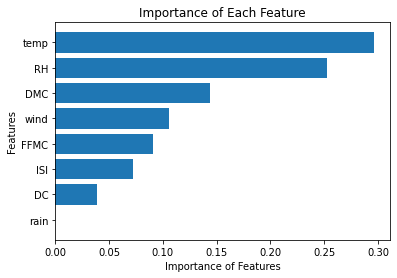

In [25]:
zip(imp,features)
imp, features=zip(*sorted(zip(imp,features)))
plt.barh(range(len(features)),imp,align='center')
plt.yticks(range(len(features)),features)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of Each Feature')
plt.show()